In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [15]:
# Load Dataset
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
dataset = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv') 

In [16]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(dataset.info())
print("\nSummary Statistics:")
print(dataset.describe(include='all'))
print("\nNull Values:")
print(dataset.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   obje

In [17]:
# Load the dataset
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

# Handling missing values
# Fill missing numerical values with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Display dataset info after filling missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [24]:
# Load the dataset
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing categorical values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are filled
print("Missing values after filling:")
print(df[categorical_cols].isnull().sum())



Missing values after filling:
Employee_ID                          0
Gender                               0
Job_Role                             0
Industry                             0
Work_Location                        0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Satisfaction_with_Remote_Work        0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [27]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode specific categorical columns
for col in ['Gender', 'Stress_Level', 'Mental_Health_Condition', 'Sleep_Quality']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Verify encoding
print("Encoded categorical variables:")
print(df[categorical_cols].head())

Encoded categorical variables:
   Employee_ID  Gender  Job_Role  Industry  Work_Location  Stress_Level  \
0            0       2         2         3              0             2   
1            1       0         0         4              2             2   
2            2       2         6         1              0             2   
3            3       1         6         2              1             0   
4            4       1         5         0              1             0   

   Mental_Health_Condition  Access_to_Mental_Health_Resources  \
0                        2                                  0   
1                        0                                  0   
2                        0                                  0   
3                        2                                  1   
4                        1                                  1   

   Productivity_Change  Satisfaction_with_Remote_Work  Physical_Activity  \
0                    0                             

In [29]:
# Drop Employee_ID column if it exists
if 'Employee_ID' in df.columns:
    df = df.drop('Employee_ID', axis=1)

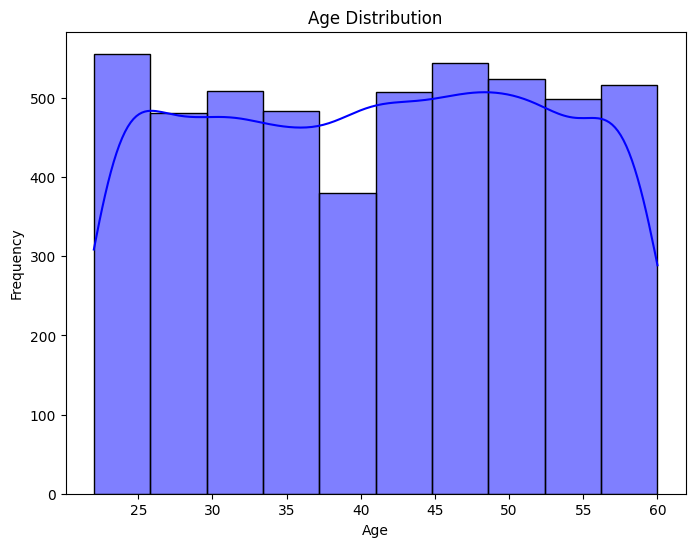

In [31]:
# Visualizations
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

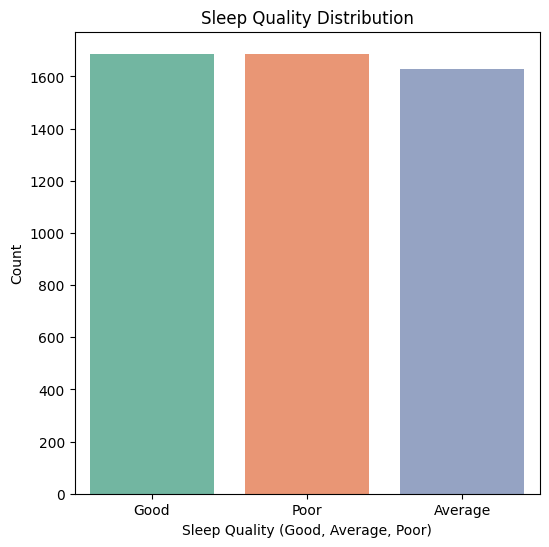

In [37]:
# Load the dataset
file_path = "Impact_of_Remote_Work_on_Mental_Health.csv"  
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Sleep_Quality Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Sleep_Quality', data=data, hue='Sleep_Quality', palette='Set2', legend=False)
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality (Good, Average, Poor)')
plt.ylabel('Count')

# Show the plot
plt.show()

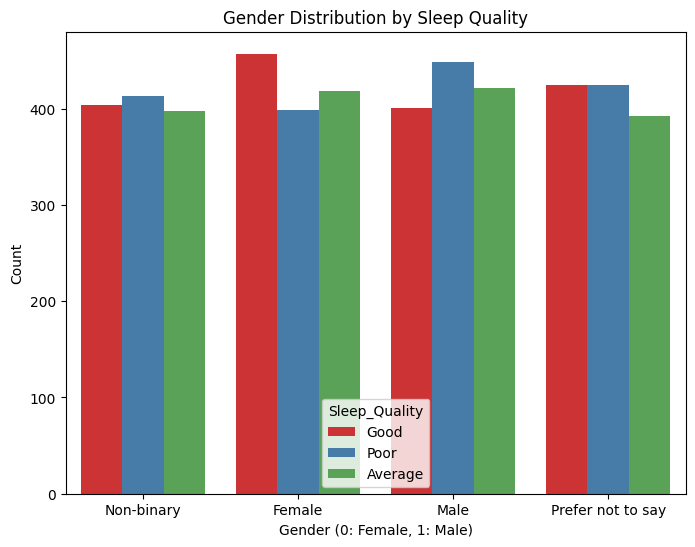

In [38]:
# Gender Distribution by Sleep Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Sleep_Quality', data=data, palette='Set1')
plt.title('Gender Distribution by Sleep Quality')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

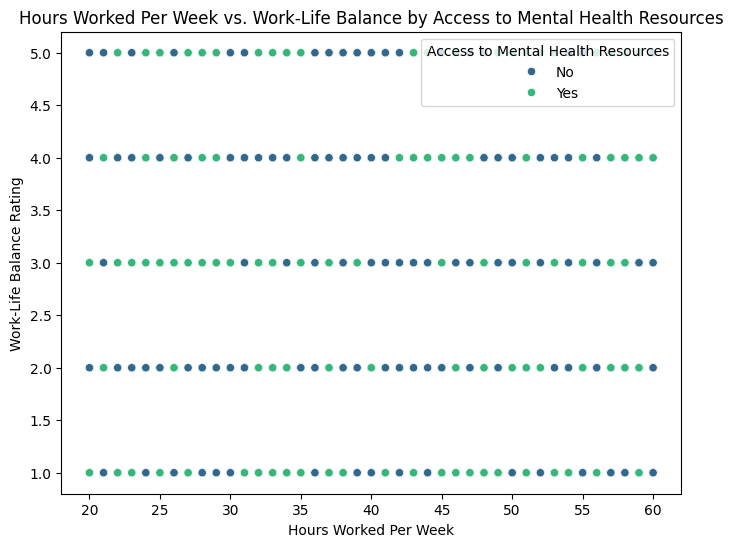

In [6]:
# Hours Worked Per Week vs. Work Life Balance Rating

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Worked_Per_Week', y='Work_Life_Balance_Rating', hue='Access_to_Mental_Health_Resources', data=data, palette='viridis')
plt.title('Hours Worked Per Week vs. Work-Life Balance by Access to Mental Health Resources')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Work-Life Balance Rating')
plt.legend(title='Access to Mental Health Resources')
plt.show()


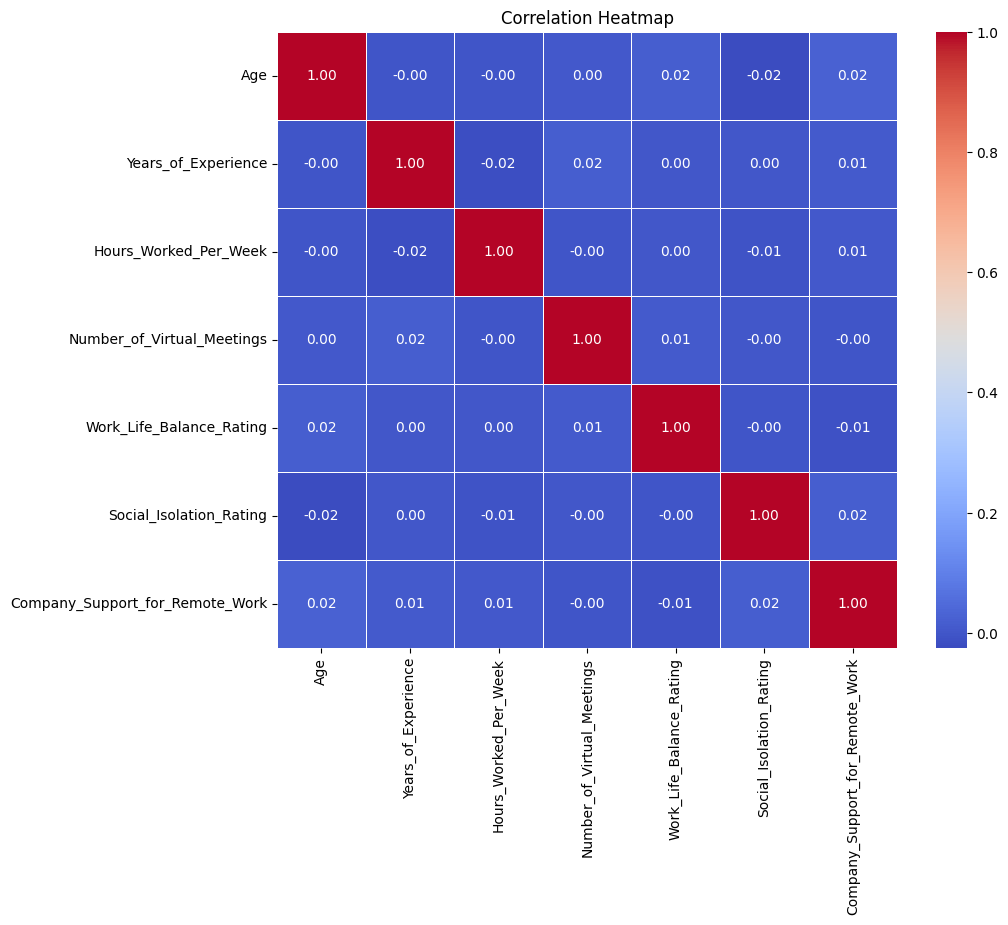

In [9]:
# Correlation Heatmap

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Prepare the data
X = data.drop('Access_to_Mental_Health_Resources', axis=1)
y = data['Access_to_Mental_Health_Resources']

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')  

# Define features (X) and target variable (y)
X = df.drop(columns=["Hours_Worked_Per_Week"])  
y = df["Hours_Worked_Per_Week"]                 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Use OrdinalEncoder with unknown value handling
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])  # Avoid KeyError

# Step 1: Train Decision Tree with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

# Step 2: Train Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Step 3: Accuracy of Each Attribute
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("\nAccuracy with Gini Index:", accuracy_gini)
print("Accuracy with Entropy:", accuracy_entropy)


print("Prediction successful!")




Accuracy with Gini Index: 0.021
Accuracy with Entropy: 0.017
Prediction successful!


In [35]:
# Step 4: Precision, Recall, F-Score

# Import necessary functions
from sklearn.metrics import precision_score, recall_score, f1_score

precision_gini = precision_score(y_test, y_pred_gini, average='macro')  # Use 'macro', 'micro', or 'weighted'
recall_gini = recall_score(y_test, y_pred_gini, average='macro')
f1_gini = f1_score(y_test, y_pred_gini, average='macro')

precision_entropy = precision_score(y_test, y_pred_entropy, average='macro')  # Use 'macro', 'micro', or 'weighted'
recall_entropy = recall_score(y_test, y_pred_entropy, average='macro')
f1_entropy = f1_score(y_test, y_pred_entropy, average='macro')

print("\nPrecision (Gini):", precision_gini)
print("Recall (Gini):", recall_gini)
print("F1-Score: (Gini):", f1_gini)

print("\nPrecision (Entropy):", precision_entropy)
print("Recall (Entropy):", recall_entropy)
print("F1-Score (Entropy):", f1_entropy)



Precision (Gini): 0.02005466204992424
Recall (Gini): 0.021240358043298036
F1-Score: (Gini): 0.019284063407507407

Precision (Entropy): 0.015163745636573063
Recall (Entropy): 0.017218816227848297
F1-Score (Entropy): 0.014660350001194526


C:\Users\Shalu Mary Abraham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


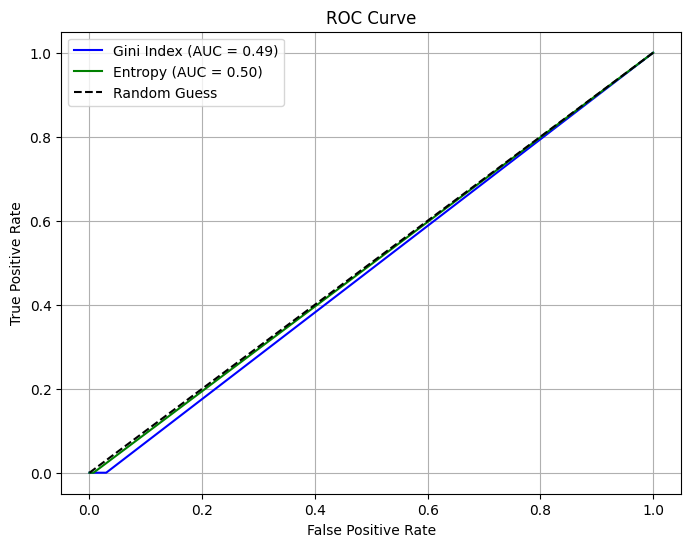

In [53]:
# Step 5: ROC Curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc
from sklearn.preprocessing import label_binarize

# Ensure binary classification
if len(np.unique(y_test)) > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))[:, 0]  # Convert to binary
else:
    y_test_bin = y_test  # Already binary

# Compute probabilities
y_pred_gini_proba = dt_gini.predict_proba(X_test)[:, 1]
y_pred_entropy_proba = dt_entropy.predict_proba(X_test)[:, 1]

# Compute ROC Curve for Gini
fpr_gini, tpr_gini, _ = roc_curve(y_test_bin, y_pred_gini_proba)
roc_auc_gini = auc(fpr_gini, tpr_gini)

# Compute ROC Curve for Entropy
fpr_entropy, tpr_entropy, _ = roc_curve(y_test_bin, y_pred_entropy_proba)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, label=f"Gini Index (AUC = {roc_auc_gini:.2f})", color='blue')
plt.plot(fpr_entropy, tpr_entropy, label=f"Entropy (AUC = {roc_auc_entropy:.2f})", color='green')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

# Formatting
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [52]:
# Step 6: Confusion Matrices
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

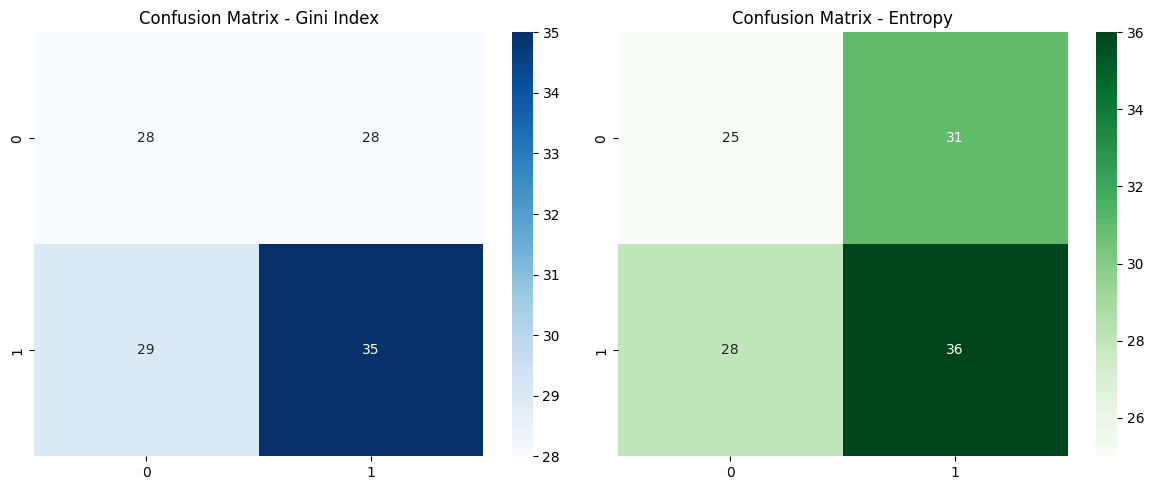

In [59]:
#Plot Confusion Matrices

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gini Index Confusion Matrix
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Confusion Matrix - Gini Index')
axes[0].set_xticks([0.5, 1.5])
axes[0].set_yticks([0.5, 1.5])
axes[0].set_xticklabels([0, 1])
axes[0].set_yticklabels([0, 1])

# Entropy Confusion Matrix
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title('Confusion Matrix - Entropy')
axes[1].set_xticks([0.5, 1.5])
axes[1].set_yticks([0.5, 1.5])
axes[1].set_xticklabels([0, 1])
axes[1].set_yticklabels([0, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


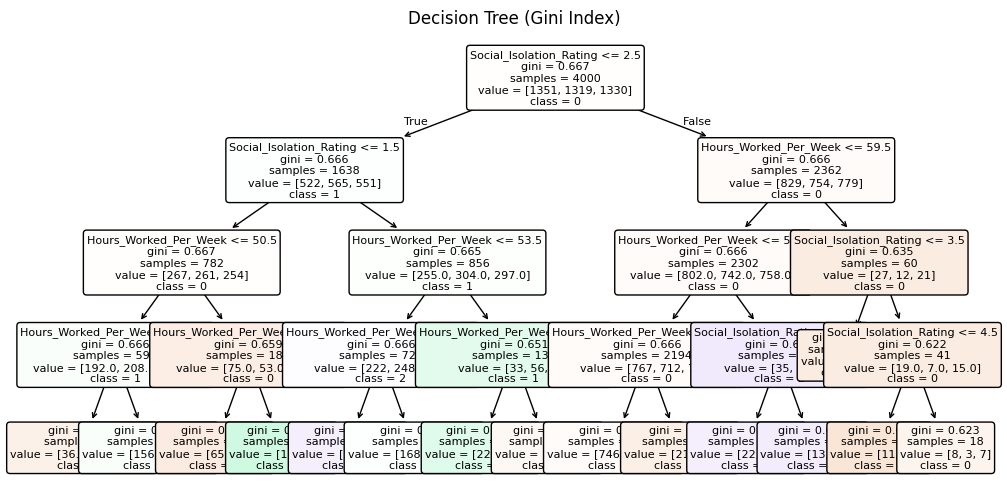

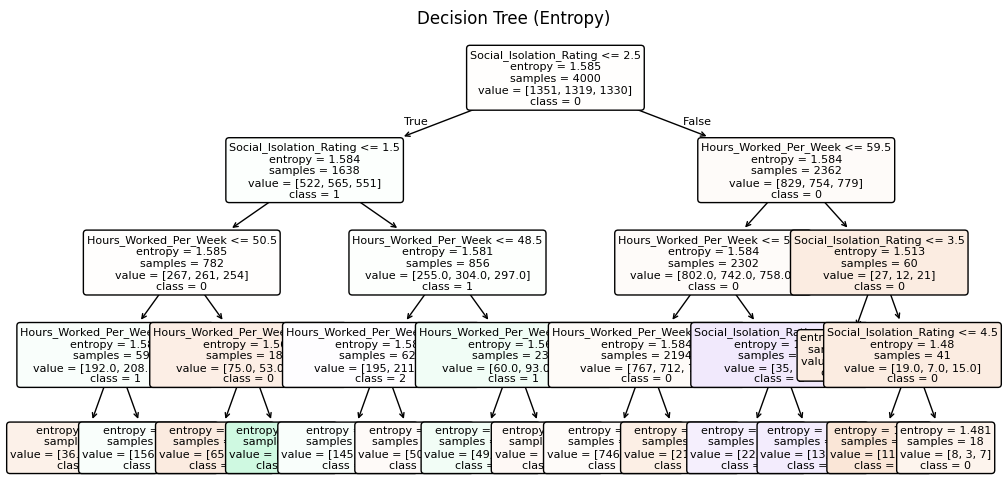

In [77]:
# Step 7: Visualization of Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting relevant features and target
features = ['Hours_Worked_Per_Week', 'Social_Isolation_Rating']
target = 'Stress_Level'

# Encoding categorical target variable
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Classifier with Gini Index (Smaller Tree)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_gini.fit(X_train, y_train)

# Training Decision Tree Classifier with Entropy (Smaller Tree)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_entropy.fit(X_train, y_train)

# Convert class names based on unique values in y_train
class_names = [str(cls) for cls in sorted(y_train.unique())]

# Plot the decision tree using Gini Index
plt.figure(figsize=(12, 6))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=8)
plt.title('Decision Tree (Gini Index)')
plt.show()

# Plot the decision tree using Entropy
plt.figure(figsize=(12, 6))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=8)
plt.title('Decision Tree (Entropy)')
plt.show()


In [78]:
# Step 8: Results and Conclusion

print("\nResults and Conclusions:")
print("- Gini Index Accuracy:", accuracy_gini)
print("- Entropy Accuracy:", accuracy_entropy)
print("- Gini Index F1 Score:", f1_gini)
print("- Entropy F1 Score:", f1_entropy)
print("- Based on the comparison, the classifier with higher F1 Score and ROC AUC can be considered better for this dataset.")


Results and Conclusions:
- Gini Index Accuracy: 0.021
- Entropy Accuracy: 0.017
- Gini Index F1 Score: 0.019284063407507407
- Entropy F1 Score: 0.014660350001194526
- Based on the comparison, the classifier with higher F1 Score and ROC AUC can be considered better for this dataset.


In [79]:
# Step 1: Pre-Pruning - Train Decision Tree with Gini Index using Pre-Pruning
dt_gini_pre = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_gini_pre.fit(X_train, y_train)
y_pred_gini_pre = dt_gini_pre.predict(X_test)

In [80]:
# Train Decision Tree with Entropy using Pre-Pruning
dt_entropy_pre = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_entropy_pre.fit(X_train, y_train)
y_pred_entropy_pre = dt_entropy_pre.predict(X_test)

In [81]:
# Step 2: Post-Pruning - Train Decision Tree without Pre-Pruning
dt_gini_full = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
# Perform Post-Pruning by limiting depth post-training
def prune_tree(tree, max_depth):
    if tree.get_depth() > max_depth:
        tree = DecisionTreeClassifier(criterion=tree.criterion, max_depth=max_depth, random_state=tree.random_state)
        tree.fit(X_train, y_train)
    return tree

dt_gini_post = prune_tree(dt_gini_full, max_depth=5)
y_pred_gini_post = dt_gini_post.predict(X_test)

In [11]:
# Metrics for Pre-Pruned Gini Tree
accuracy_gini_pre = accuracy_score(y_test, y_pred_gini_pre)
precision_gini_pre = precision_score(y_test, y_pred_gini_pre, average='macro')
recall_gini_pre = recall_score(y_test, y_pred_gini_pre, average='macro')
f1_gini_pre = f1_score(y_test, y_pred_gini_pre, average='macro')

NameError: name 'y_pred_gini_pre' is not defined

In [86]:
# Metrics for Post-Pruned Gini Tree
accuracy_gini_post = accuracy_score(y_test, y_pred_gini_post)
precision_gini_post = precision_score(y_test, y_pred_gini_post, average='macro')
recall_gini_post = recall_score(y_test, y_pred_gini_post, average='macro')
f1_gini_post = f1_score(y_test, y_pred_gini_post, average='macro')

print("\nPre-Pruned Gini Metrics:")
print(f"Accuracy: {accuracy_gini_pre}, Precision: {precision_gini_pre}, Recall: {recall_gini_pre}, F1 Score: {f1_gini_pre}")

print("\nPost-Pruned Gini Metrics:")
print(f"Accuracy: {accuracy_gini_post}, Precision: {precision_gini_post}, Recall: {recall_gini_post}, F1 Score: {f1_gini_post}")


Pre-Pruned Gini Metrics:
Accuracy: 0.342, Precision: 0.3437981510015408, Recall: 0.3406906776719583, F1 Score: 0.32995817789389

Post-Pruned Gini Metrics:
Accuracy: 0.342, Precision: 0.3437981510015408, Recall: 0.3406906776719583, F1 Score: 0.32995817789389


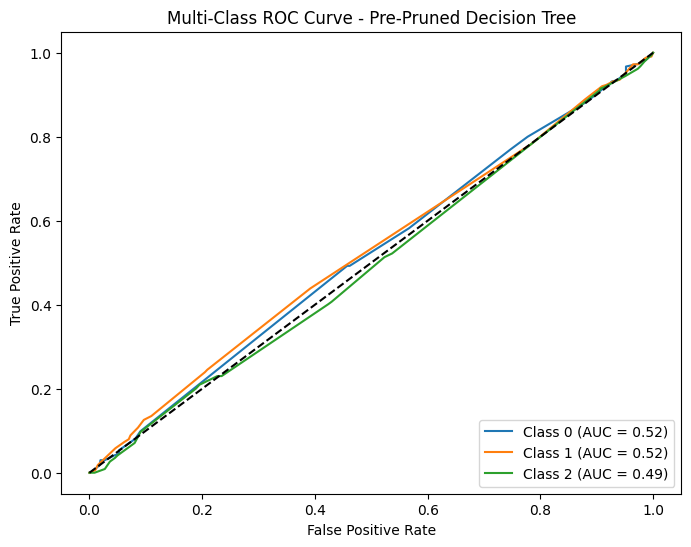

In [89]:
# Step 3: ROC Curve for Pre-Pruned Tree

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Step 1: Binarize y_test for multi-class ROC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
n_classes = y_test_bin.shape[1]  # Number of classes

# Step 2: Get predicted probabilities for each class
y_score = dt_gini_pre.predict_proba(X_test)

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Step 4: Add diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Step 5: Label the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Pre-Pruned Decision Tree')
plt.legend(loc='lower right')
plt.show()


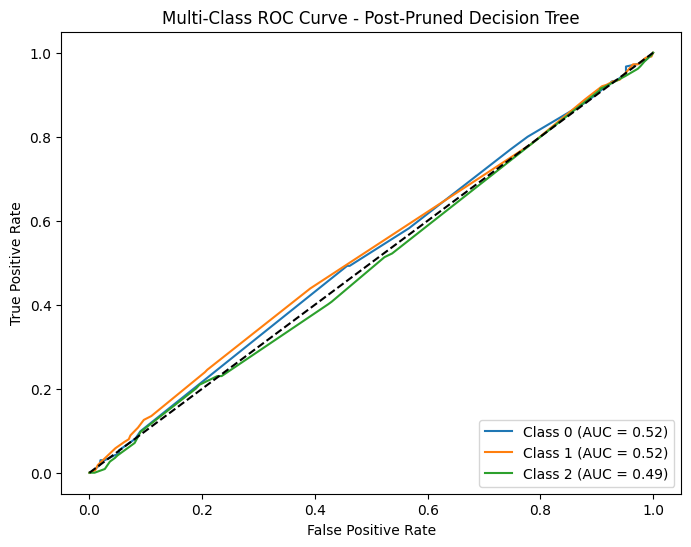

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Step 1: Binarize y_test for multi-class ROC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
n_classes = y_test_bin.shape[1]  # Number of classes

# Step 2: Get predicted probabilities for each class
y_score = dt_gini_post.predict_proba(X_test)

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Step 4: Add diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Step 5: Label the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Post-Pruned Decision Tree')
plt.legend(loc='lower right')
plt.show()


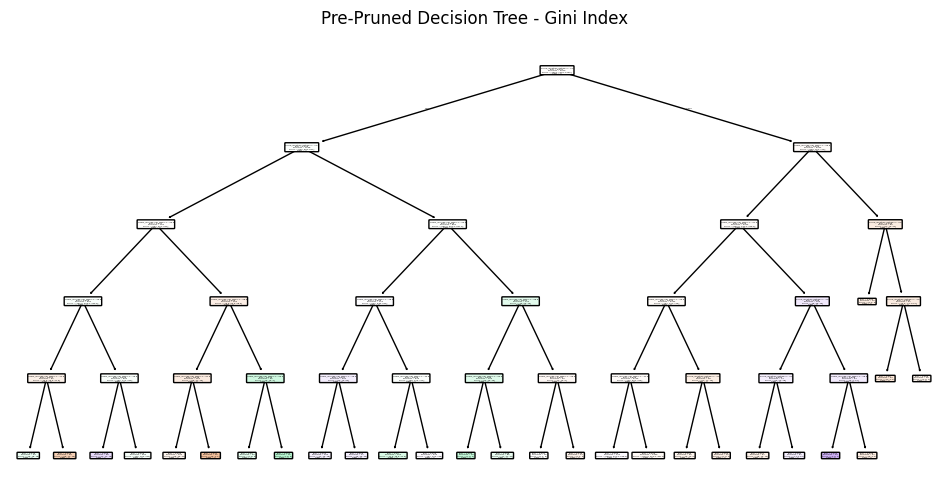

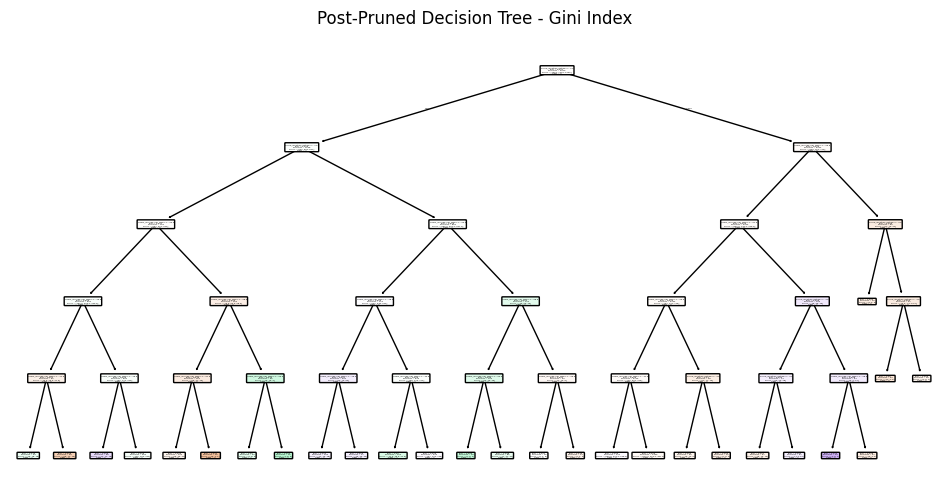

In [93]:
# Step 4: Visualization of Trees

plt.figure(figsize=(12, 6))
plot_tree(dt_gini_pre, 
          filled=True, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in dt_gini_pre.classes_],  # Auto-fetch class names
          rounded=True)
plt.title('Pre-Pruned Decision Tree - Gini Index')
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(dt_gini_post, 
          filled=True, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in dt_gini_post.classes_],  # Auto-fetch class names
          rounded=True)
plt.title('Post-Pruned Decision Tree - Gini Index')
plt.show()


In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Ensure AUC values are computed
def compute_auc(model, X_test, y_test):
    """Computes the ROC AUC score, handling both binary and multiclass cases."""
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] > 2:  # Multiclass classification
            return roc_auc_score(y_test, y_pred_proba, multi_class="ovr")  
        elif y_pred_proba.shape[1] == 2:  # Binary classification
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
            return auc(fpr, tpr)
    return None  # Model does not support probability predictions

# Compute AUC for pre-pruned and post-pruned models
roc_auc_gini_pre = compute_auc(dt_gini_pre, X_test, y_test)
roc_auc_gini_post = compute_auc(dt_gini_post, X_test, y_test)

# Print Results
print("\nResults and Conclusions for Pruned Decision Trees:")
if roc_auc_gini_pre is not None and roc_auc_gini_post is not None:
    print(f"Pre-Pruned Gini AUC: {roc_auc_gini_pre:.4f}, Post-Pruned Gini AUC: {roc_auc_gini_post:.4f}")
else:
    print("Error: Unable to compute AUC values. Check model predictions and target labels.")

print("\nKey Observations:")
print("- Pre-pruning helps in generalization by limiting tree complexity during training.")
print("- Post-pruning reduces overfitting by simplifying the tree after training, improving interpretability.")



Results and Conclusions for Pruned Decision Trees:
Pre-Pruned Gini AUC: 0.5106, Post-Pruned Gini AUC: 0.5106

Key Observations:
- Pre-pruning helps in generalization by limiting tree complexity during training.
- Post-pruning reduces overfitting by simplifying the tree after training, improving interpretability.
